In [1]:
pip install numpy pandas scikit-learn matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Importación de librerías básicas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Librerías para dividir datos y entrenar el modelo
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
# Cargamos el dataset 
rutas = [
    r"C:\Users\Usuario\OneDrive\Documentos\Cursos UNAD\Cursos UNAD 5\ANÁLISIS DE DATOS\Anexo 2 - Dataset Vehicle\car details v4.csv",
    r"C:\Users\Usuario\OneDrive\Documentos\Cursos UNAD\Cursos UNAD 5\ANÁLISIS DE DATOS\Anexo 2 - Dataset Vehicle\car data.csv",
    r"C:\Users\Usuario\OneDrive\Documentos\Cursos UNAD\Cursos UNAD 5\ANÁLISIS DE DATOS\Anexo 2 - Dataset Vehicle\CAR DETAILS FROM CAR DEKHO.csv",
    r"C:\Users\Usuario\OneDrive\Documentos\Cursos UNAD\Cursos UNAD 5\ANÁLISIS DE DATOS\Anexo 2 - Dataset Vehicle\Car details v3.csv"
]

# Leer y combinar los archivos
dataframes = [pd.read_csv(ruta) for ruta in rutas]  # Cargar cada archivo en un DataFrame
data = pd.concat(dataframes, ignore_index=True, sort=False)  # Combinar todos los DataFrames

In [19]:
# Limpieza de datos
data.columns = data.columns.str.lower().str.replace(' ', '_')  # Normalizar nombres de columnas
data.dropna(subset=['price'], inplace=True)  # Eliminar filas sin precio

# Función para limpiar y convertir a float
def clean_and_convert_to_float(series, pattern):
    return series.replace(pattern, '', regex=True).replace(r'\D', '', regex=True).astype(float)

# Limpiar y convertir las columnas
data['mileage'] = clean_and_convert_to_float(data['mileage'], r' kmpl')
data['engine'] = clean_and_convert_to_float(data['engine'], r' [A-Za-z]+')
data['max_power'] = clean_and_convert_to_float(data['max_power'], r' bhp')
data['torque'] = clean_and_convert_to_float(data['torque'], r' Nm')

In [21]:
# Verificación de los cambios
print(data[['mileage', 'engine', 'max_power', 'torque']].head())

   mileage  engine  engine  max_power  max_power  torque
0      NaN  1198.0     NaN   876000.0        NaN     NaN
1      NaN  1248.0     NaN   744000.0        NaN     NaN
2      NaN  1197.0     NaN   796000.0        NaN     NaN
3      NaN  1197.0     NaN   826000.0        NaN     NaN
4      NaN  2393.0     NaN  1483400.0        NaN     NaN


In [25]:
# Limpieza de datos
data.columns = data.columns.str.lower().str.replace(' ', '_')  # Normalizar nombres de columnas
data.dropna(subset=['price'], inplace=True)  # Eliminar filas sin precio
data['mileage'] = data['mileage'].replace(r' kmpl', '', regex=True).astype(float)  # Convertir mileage a float
data['engine'] = data['engine'].replace(r' [A-Za-z]+', '', regex=True).astype(float)  # Convertir engine a float
data['max_power'] = data['max_power'].replace(r' bhp', '', regex=True).astype(float)  # Convertir max_power a float
data['torque'] = data['torque'].replace(r' Nm', '', regex=True).astype(float)  # Convertir torque a float

In [29]:
# Exploración de datos
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2059 entries, 0 to 2058
Data columns (total 39 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   make                2059 non-null   object 
 1   model               2059 non-null   object 
 2   price               2059 non-null   float64
 3   year                2059 non-null   float64
 4   kilometer           2059 non-null   float64
 5   fuel_type           2059 non-null   object 
 6   transmission        2059 non-null   object 
 7   location            2059 non-null   object 
 8   color               2059 non-null   object 
 9   owner               2059 non-null   object 
 10  seller_type         2059 non-null   object 
 11  engine              1979 non-null   float64
 12  max_power           1979 non-null   float64
 13  max_torque          1979 non-null   object 
 14  drivetrain          1923 non-null   object 
 15  length              1995 non-null   float64
 16  width      

In [31]:
print(data.describe())

              price         year     kilometer       engine     max_power  \
count  2.059000e+03  2059.000000  2.059000e+03  1979.000000  1.979000e+03   
mean   1.702992e+06  2016.425449  5.422471e+04  1692.575543  1.300980e+06   
std    2.419881e+06     3.363564  5.736172e+04   643.736294  6.641106e+05   
min    4.900000e+04  1988.000000  0.000000e+00   624.000000  1.120000e+02   
25%    4.849990e+05  2014.000000  2.900000e+04  1197.000000  8.360000e+05   
50%    8.250000e+05  2017.000000  5.000000e+04  1498.000000  1.166600e+06   
75%    1.925000e+06  2019.000000  7.200000e+04  1995.000000  1.713675e+06   
max    3.500000e+07  2022.000000  2.000000e+06  6592.000000  6.776200e+06   

            length        width       height  seating_capacity  \
count  1995.000000  1995.000000  1995.000000       1995.000000   
mean   4280.860652  1767.991980  1591.735338          5.306266   
std     442.458507   135.265825   136.073956          0.822170   
min    3099.000000  1475.000000  1165.0000

In [39]:
# Verificar los tipos de datos
print(data.dtypes)

make                   object
model                  object
price                 float64
year                  float64
kilometer             float64
fuel_type              object
transmission           object
location               object
color                  object
owner                  object
seller_type            object
engine                float64
max_power             float64
max_torque             object
drivetrain             object
length                float64
width                 float64
height                float64
seating_capacity      float64
fuel_tank_capacity    float64
car_name               object
selling_price         float64
present_price         float64
kms_driven            float64
fuel_type              object
seller_type            object
name                   object
year                  float64
selling_price         float64
km_driven             float64
fuel                   object
seller_type            object
transmission           object
owner     

In [53]:
# Filtrar solo columnas numéricas
numeric_data = data.select_dtypes(include=['float64', 'int64'])

In [41]:
# Mostrar las primeras filas del DataFrame de columnas numéricas
print(numeric_data.head())

       price    year  kilometer  engine  max_power  length   width  height  \
0   505000.0  2017.0    87150.0  1198.0   876000.0  3990.0  1680.0  1505.0   
1   450000.0  2014.0    75000.0  1248.0   744000.0  3995.0  1695.0  1555.0   
2   220000.0  2011.0    67000.0  1197.0   796000.0  3585.0  1595.0  1550.0   
3   799000.0  2019.0    37500.0  1197.0   826000.0  3995.0  1745.0  1510.0   
4  1950000.0  2018.0    69000.0  2393.0  1483400.0  4735.0  1830.0  1795.0   

   seating_capacity  fuel_tank_capacity  ...  present_price  kms_driven  year  \
0               5.0                35.0  ...            NaN         NaN   NaN   
1               5.0                42.0  ...            NaN         NaN   NaN   
2               5.0                35.0  ...            NaN         NaN   NaN   
3               5.0                37.0  ...            NaN         NaN   NaN   
4               7.0                55.0  ...            NaN         NaN   NaN   

   selling_price  km_driven  mileage  engine

In [42]:
# Revisar si hay columnas duplicadas
print(numeric_data.columns[numeric_data.columns.duplicated()])

Index(['year', 'selling_price', 'engine', 'max_power'], dtype='object')


In [55]:
# Eliminar columnas duplicadas
numeric_data = numeric_data.loc[:, ~numeric_data.columns.duplicated()]

In [44]:
# Comprobar valores nulos
print(numeric_data.isnull().sum())

price                    0
year                     0
kilometer                0
engine                  80
max_power               80
length                  64
width                   64
height                  64
seating_capacity        64
fuel_tank_capacity     113
selling_price         2059
present_price         2059
kms_driven            2059
km_driven             2059
mileage               2059
torque                2059
seats                 2059
dtype: int64


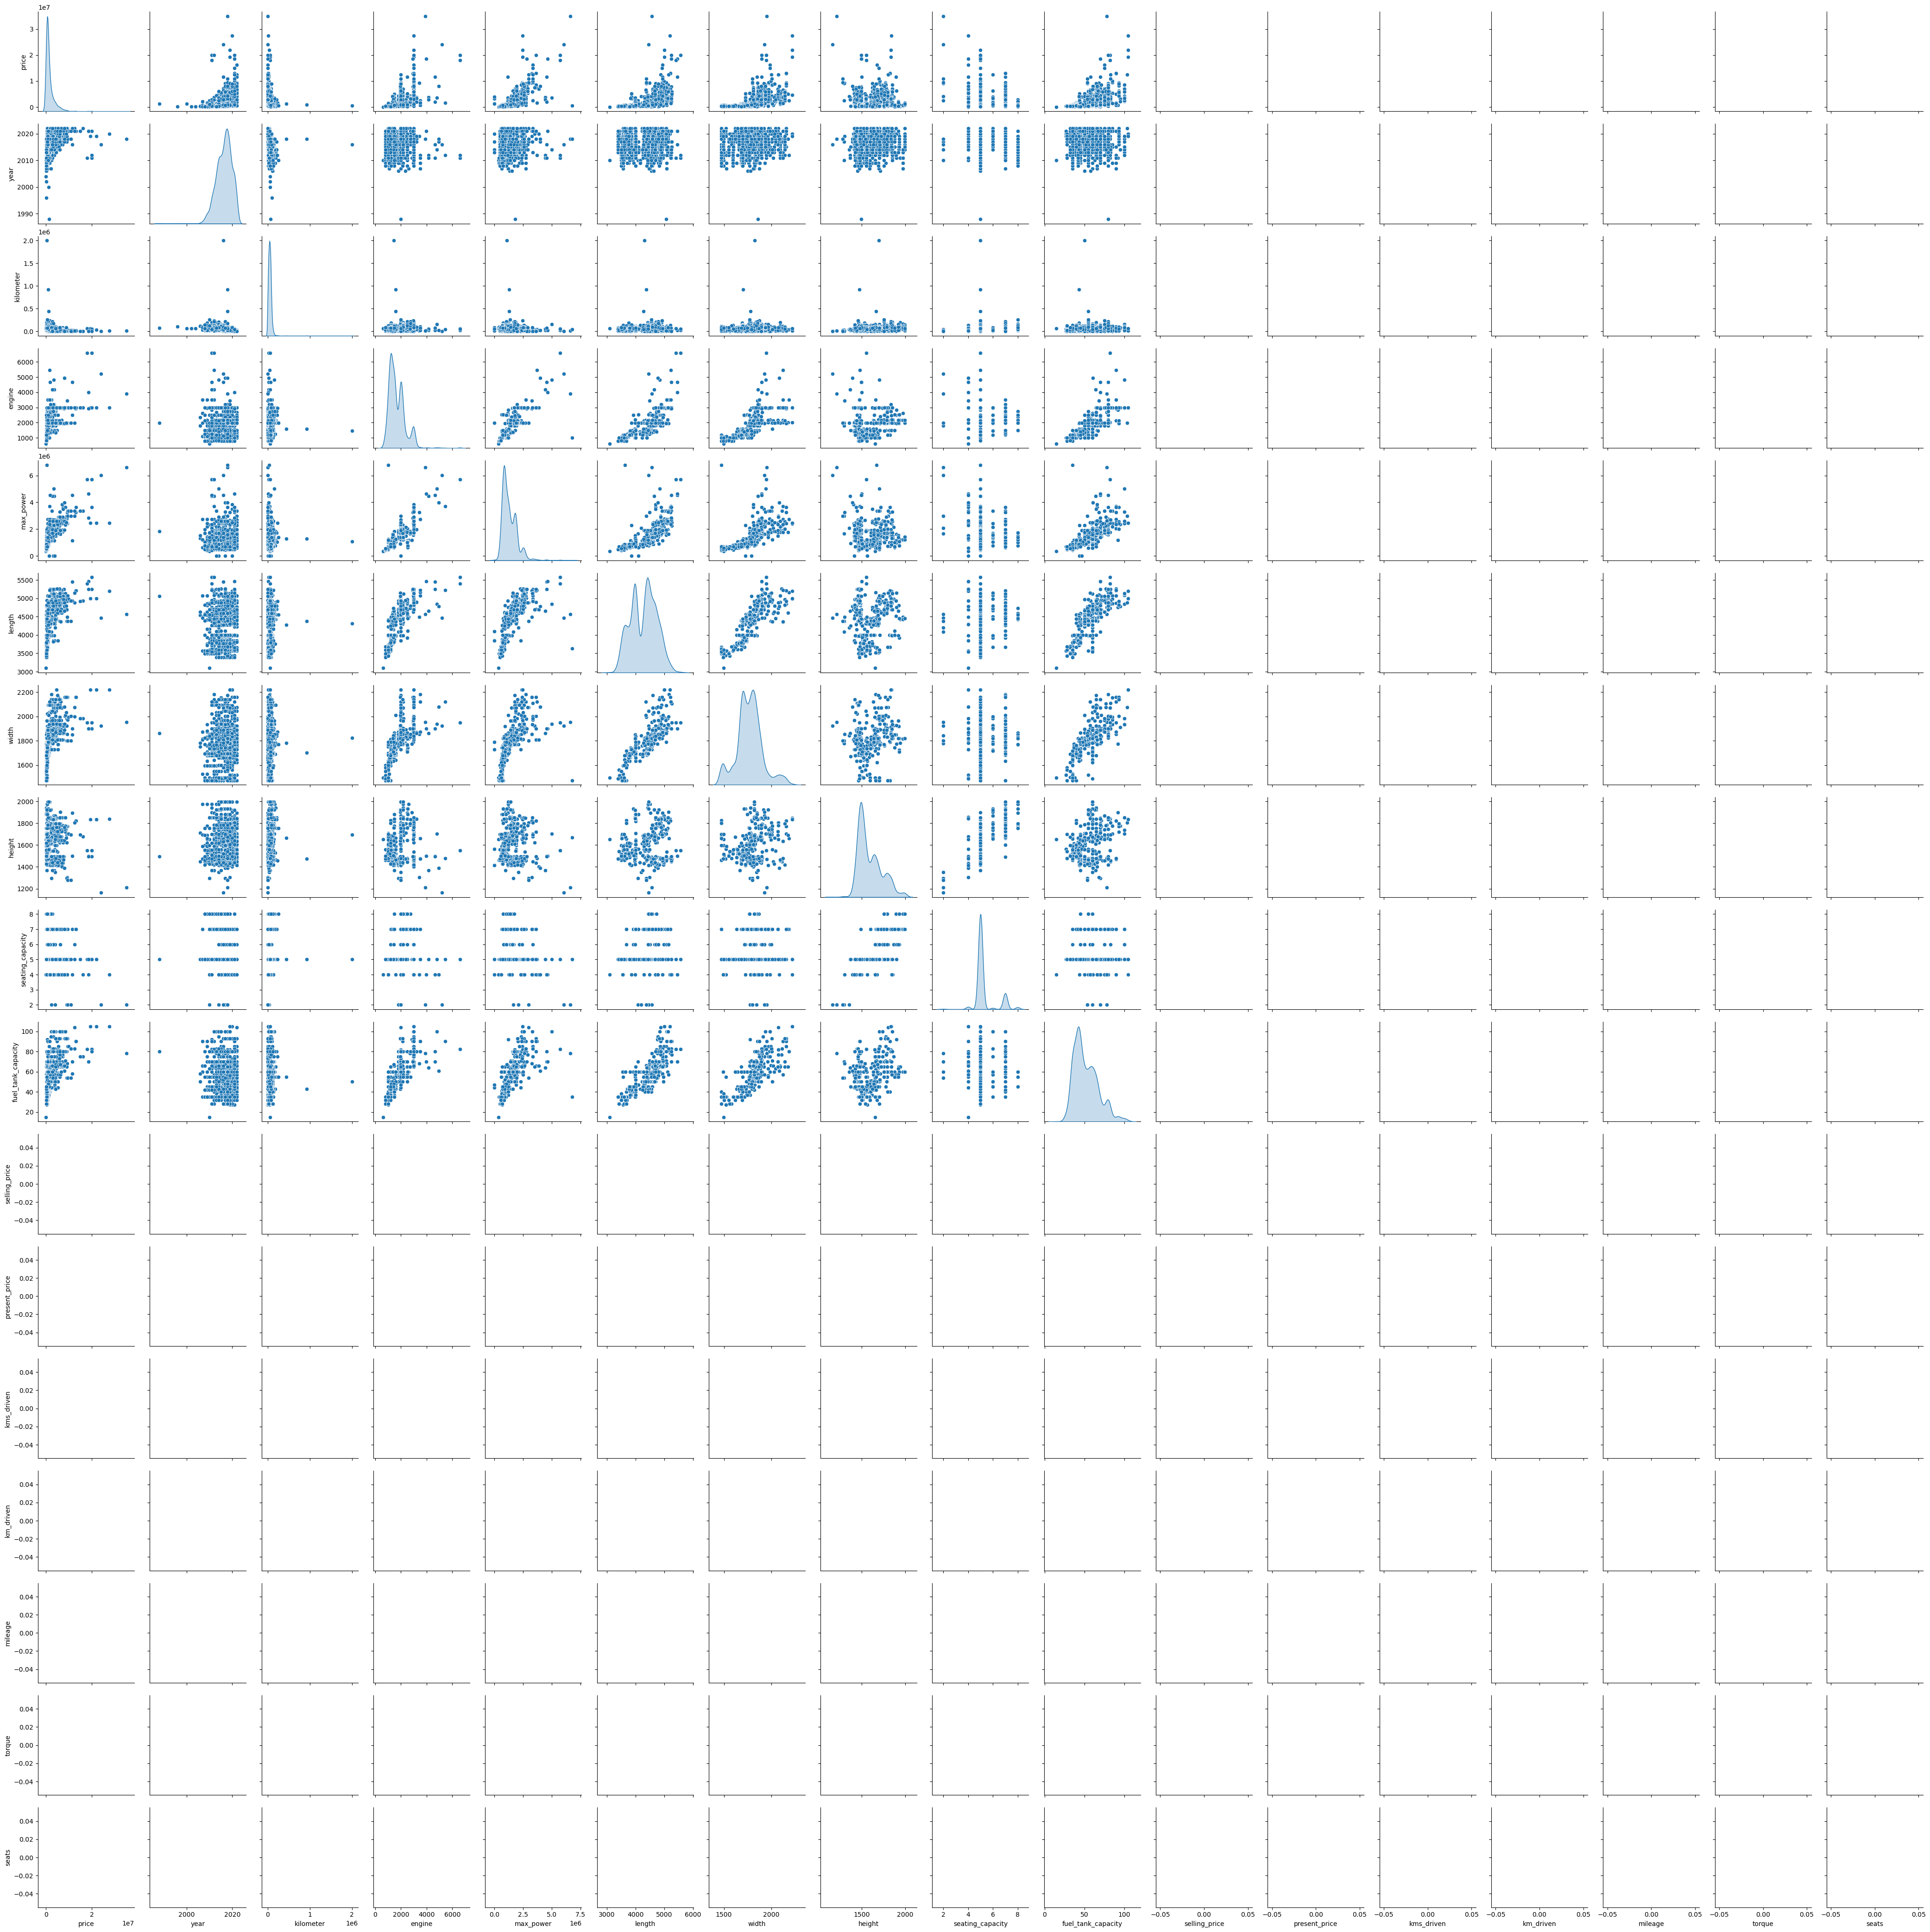

In [51]:
# Realizar el pairplot
sns.pairplot(numeric_data, diag_kind='kde')
plt.show()

In [57]:
# Variables dependientes e independientes
X = data[['year', 'kilometer', 'mileage', 'engine', 'max_power', 'torque']]
y = data['price']

In [59]:
# División del conjunto de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
# Entrenamiento del modelo
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [63]:
# Predicciones y evaluación
y_pred = model.predict(X_test)
print(f'Error Cuadrático Medio: {mean_squared_error(y_test, y_pred)}')
print(f'R^2: {r2_score(y_test, y_pred)}')

Error Cuadrático Medio: 1549120447220.576
R^2: 0.7782625428981005


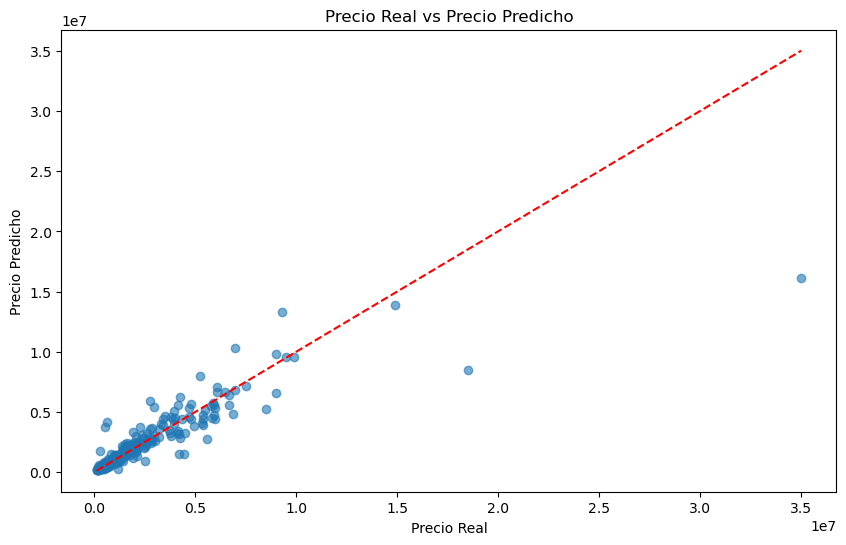

In [65]:
# Visualización de errores
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel('Precio Real')
plt.ylabel('Precio Predicho')
plt.title('Precio Real vs Precio Predicho')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.show()